# Project proposal

### Brief description

The dataset contains purchase data from 2015-2016, covering categories such as Accessories, Bikes, and Clothing. It includes detailed transaction information, such as the price, cost, and the time each transaction was made. Additionally, customer information, such as gender, age, country, and state, is provided, enabling a deeper analysis of customer behavior and trends.

**Research Questions**

For this analysis, I am particularly interested in exploring the 'Revenue' column. I aim to examine the relationship between demographics and revenue, as well as the correlation between different time periods (e.g., half-year or quarterly) and revenue. This will help determine if spending patterns vary based on demographic factors or over time.

**EDA Process:**

During the exploratory data analysis (EDA), I noticed that the "Product Category" column shows that "Accessories" account for the majority of the transactions in the dataset. Despite this, there appears to be limited research or analysis available on accessories purchasing trends, particularly in online retail. Therefore, I believe that focusing on accessories purchases could yield valuable insights, especially when analyzed across different time periods or demographic segments.

For the purchase data, I plan to compare the average spending (revenue) with the expected amount spent per transaction during a similar time period. This comparison will allow me to assess whether there have been any significant changes in accessories spending over time, using a one-sample t-test.

Furthermore, it is often assumed that women tend to spend more than men. I will use visualizations and hypothesis testing to verify this assumption. If a significant difference is found, further hypothesis testing will be conducted to assess the significance of this difference between the two gender groups.

**Data Preprocessing:**

For the data preprocessing steps, I will begin by checking for any missing values or inconsistencies in data types. Following that, I will filter the dataset to focus specifically on "Accessories" data. Using the info() and describe() functions, I will generate a brief overview of the dataset to ensure the data is well-prepared for analysis.


In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd




### Loading data and data cleaning

In [174]:
path = '/Users/bella/Desktop/NEU/IE6200Stats/Project/data'
data = pd.read_csv(path + '/salesforcourse-4fe2kehu.csv')
data = pd.DataFrame(data)


In [175]:
data = data[data['Product Category'] == 'Accessories']

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 22534 entries, 0 to 34851
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             22534 non-null  int64  
 1   Date              22534 non-null  object 
 2   Year              22534 non-null  int64  
 3   Month             22534 non-null  object 
 4   Customer Age      22534 non-null  int64  
 5   Customer Gender   22534 non-null  object 
 6   Country           22534 non-null  object 
 7   State             22534 non-null  object 
 8   Product Category  22534 non-null  object 
 9   Sub Category      22534 non-null  object 
 10  Quantity          22534 non-null  int64  
 11  Unit Cost         22534 non-null  float64
 12  Unit Price        22534 non-null  float64
 13  Cost              22534 non-null  int64  
 14  Revenue           22534 non-null  int64  
 15  year_h            22534 non-null  object 
 16  Quarter           22534 non-null  object 
dty

## Visualization

### Compare distributions of spending across H1 and H2 (log scale)

**Revenue**: the amount per customer spent per transaction

**year_h**: the first half year (H1) and the second half year (H2)

**Result** 

Comparing the spending (revenue) between the first and second halves of the year, we observe that the revenue in the first half of the year (H1) is usually slightly higher than that in the second half (H2). However, the difference is not significant. Additionally, it is evident that there are more instances of high-revenue transactions occurring in the first half of the year, suggesting that certain periods within H1 may drive a higher volume of spending.

/var/folders/14/9h283kqx58z105l23gk4_w740000gn/T/ipykernel_16658/3195546083.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




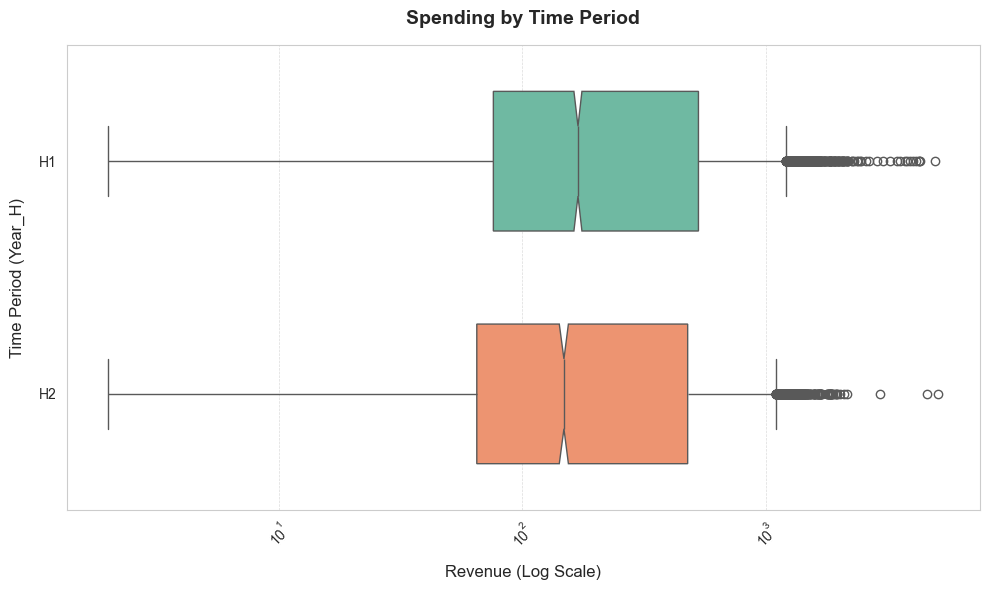

In [176]:
data_1 = data[['Revenue', 'year_h']]

sns.set_style("whitegrid")
sns.set_palette("Set2")  

plt.figure(figsize=(10, 6))  
sns.boxplot(x='Revenue', y='year_h', data=data_1, notch=True, width=0.6, saturation=0.8, palette='Set2')

plt.xscale('log')
plt.xticks(fontsize=10, rotation=45) 
plt.yticks(fontsize=10)

plt.title('Spending by Time Period', fontsize=14, weight='bold', pad=15)
plt.xlabel('Revenue (Log Scale)', fontsize=12, labelpad=10)
plt.ylabel('Time Period (Year_H)', fontsize=12, labelpad=10)

plt.grid(visible=True, axis='x', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

### Overall trend for Spending (log scale)

**Revenue**: the amount per customer spent per transaction

**Frequency**: Number of transaction

**Result**

Most of the transactions are below $100, indicating that customers typically spend less than $100 on accessories. This suggests that accessories are generally lower-cost items, making them more affordable and appealing to a wider range of customers.


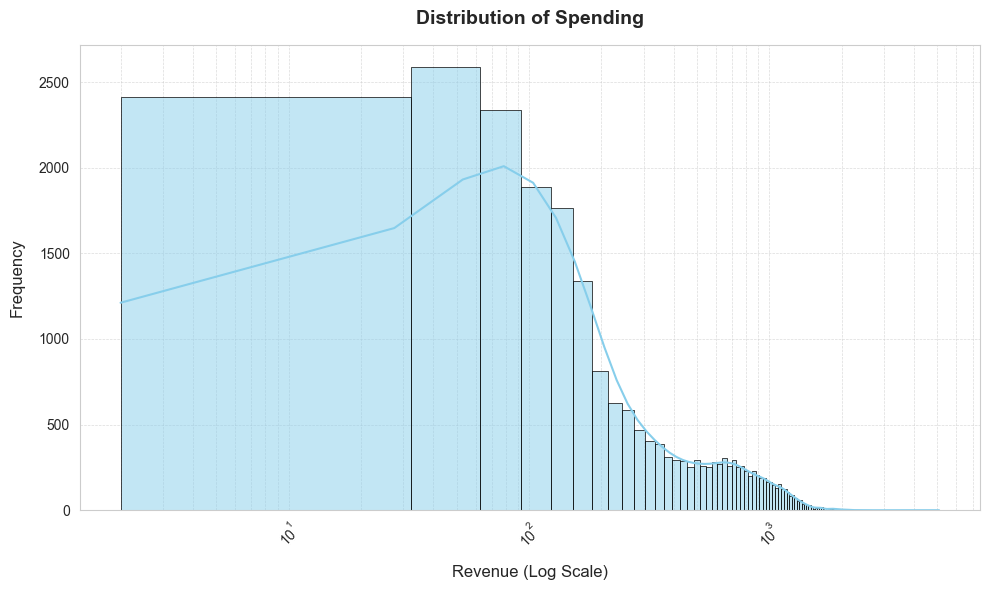

In [165]:
sns.set_style("whitegrid")  
sns.set_palette("muted")   

plt.figure(figsize=(10, 6)) 
sns.histplot(data['Revenue'], kde=True, color='skyblue', edgecolor='black', linewidth=0.5)

plt.xscale('log')
plt.xticks(fontsize=10, rotation=45) 
plt.yticks(fontsize=10)           

plt.title('Distribution of Spending', fontsize=14, weight='bold', pad=15)
plt.xlabel('Revenue (Log Scale)', fontsize=12, labelpad=10)
plt.ylabel('Frequency', fontsize=12, labelpad=10)

plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


### Overall trend for Spending by Gender and Age group

**Result:**

Among the four age groups, we observe that in the 17–30 age group, men spend more on average than women. In contrast, for the 31–45 and 46–60 age groups, the spending difference between men and women is relatively small. For individuals aged 60 and above, women tend to spend more than men, with an average difference of approximately $50. This pattern suggests that spending behaviors may vary significantly depending on both age and gender.

/var/folders/14/9h283kqx58z105l23gk4_w740000gn/T/ipykernel_16658/4214525383.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



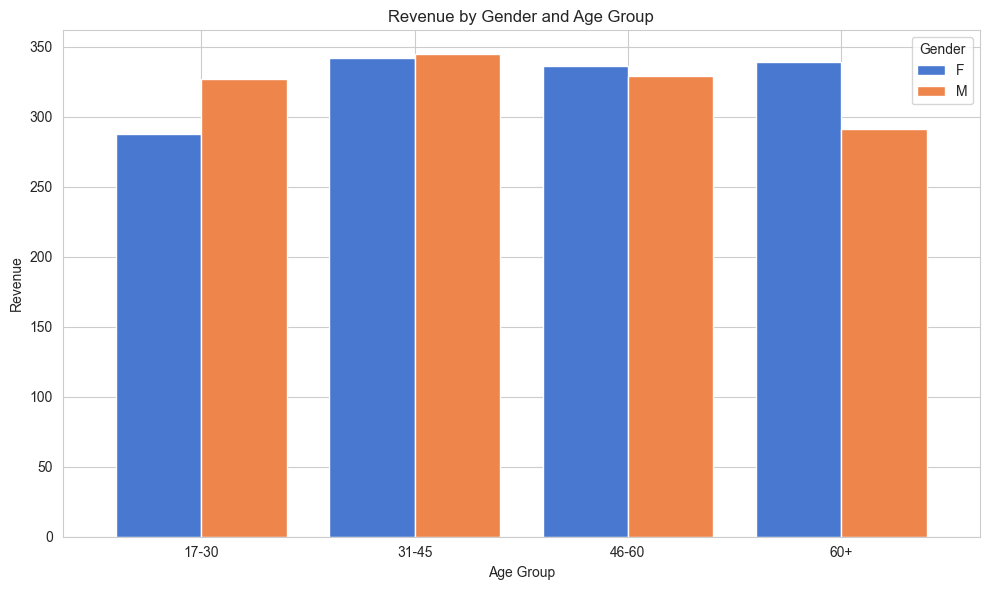

In [168]:
bins = [17, 30, 45, 60, 87]  
labels = ["17-30", "31-45", "46-60", "60+"]  
data['Age Group'] = pd.cut(data['Customer Age'], bins=bins, labels=labels, right=False)

agg_df = data.groupby(['Age Group', 'Customer Gender'])['Revenue'].mean().unstack()

agg_df.plot(kind='bar', figsize=(10, 6), width=0.8)

plt.title('Revenue by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()

plt.show()

### Heatmap for transaction by country (Only consider US, UK, France, Germany)

**Result:** 

Since the dataset only includes data from four countries, we calculated the average spending per transaction by country and visualized the results on a heatmap. From the analysis, we observe that customers from Europe, specifically Germany and France, tend to spend more on accessories, with an average of around $400 per transaction. In contrast, customers from the United States and the United Kingdom generally spend less, with an average of approximately $300 per transaction. This highlights potential regional differences in spending habits on accessories, which could be influenced by factors such as purchasing power, cultural preferences, or product availability.

In [169]:
country_revenue = data.groupby('Country')['Revenue'].mean().reset_index()

fig = px.choropleth(
    country_revenue,
    locations='Country',          
    locationmode='country names',   
    color='Revenue',                
    title='Geographic Sales Heatmap',
    color_continuous_scale='Viridis' 
)

fig.show()

### Confidence Intervals

**Confidence Intervals:**

Males, on average, spend slightly more than females. The confidence intervals for male and female spending overlap slightly, suggesting that while there is a difference in average spending, it may not be statistically significant.

**Range of Spending Estimates:**

For females, the 95% confidence interval indicates that the true mean spending lies between $317.16 and $331.04. For males, the 95% confidence interval shows that the true mean spending lies between $328.70 and $342.95. These intervals are relatively narrow, which reflects the precision of the estimates due to a large sample size.

**Implications:**

Although males seem to spend more on average, the overlap in confidence intervals suggests that the observed difference may not be substantial or could be influenced by other factors such as product preferences, age, or regional variations. Further statistical testing (e.g., a two-sample t-test) might be required to determine if the difference is statistically significant. In conclusion, while there is evidence that males might spend more, the marginal difference warrants deeper analysis to identify other potential contributing factors.

In [170]:
# checking the data row count by gender
print('Female (All):',(data['Customer Gender'] == 'F').sum())  
print('Male (All):', (data['Customer Gender'] == 'M').sum()) 

# only get the first 11000 rows
result = data.groupby('Customer Gender').head(11000)

print('Female (First 11000):',(result['Customer Gender'] == 'F').sum())  
print('Male (First 11000):', (result['Customer Gender'] == 'M').sum()) 

df = result
spending_F = df[df['Customer Gender'] == 'F']['Revenue']
spending_M = df[df['Customer Gender'] == 'M']['Revenue']

def calculate_ci(data, confidence=0.95):
    mean = data.mean()
    sem = stats.sem(data)  # Standard error of the mean
    ci = stats.t.interval(confidence, len(data)-1, loc=mean, scale=sem)
    return mean, ci

F_mean, F_ci = calculate_ci(spending_F)
M_mean, M_ci = calculate_ci(spending_M)

print(f"F Mean: {F_mean}, Confidence Interval: {F_ci}")
print(f"M Mean: {M_mean}, Confidence Interval: {M_ci}")


Female (All): 11042
Male (All): 11492
Female (First 11000): 11000
Male (First 11000): 11000
F Mean: 324.10118181818183, Confidence Interval: (np.float64(317.1590097928093), np.float64(331.04335384355437))
M Mean: 335.82236363636366, Confidence Interval: (np.float64(328.6957923628808), np.float64(342.9489349098465))


### Hypothesis Testing
**One-Sample t-Test**

**Background**


After reviewing the purchase data for accessories, we observed that in 2015–2016, the average spending was approximately $329. However, when compared to the average spending in the U.S. in 2021, we noticed a significant drop, with an average of just $117 spent on accessories—almost three times lower than the 2015–2016 figure. Therefore, I decided to conduct a one-sample t-test to determine whether this difference is statistically significant or if it might be attributed to other factors, making it insignificant.

**Hypothesis:**

H0: μ(average sample mean) = 117 

Ha: μ != 117

**Result**

1. The t-statistic value of 84.50 indicates how many standard deviations the sample mean is from the target mean of $117.

2. A p-value of 0.0 indicates that the probability of observing a sample mean this extreme under the null hypothesis is virtually zero.

3. With a p-value < 0.05, we reject the null hypothesis.
This means the average revenue in my dataset is statistically significantly different from the target mean of $117.

4. Since the t-statistic is extremely large, it suggests that the sample mean is much higher than the target mean of $117.
Given the large sample size (22,000 samples), this conclusion is robust and unlikely to be due to random variation.

In [171]:
target_mean = 117 # In 2021, the average American household spent $117 on accessories per transaction
spending = data['Revenue']
print('Average Spending', spending.mean())

t_stat, p_value = stats.ttest_1samp(spending, target_mean)
print(f"One-Sample T-Test: T-statistic = {t_stat}, P-value = {p_value}")


Average Spending 329.309665394515
One-Sample T-Test: T-statistic = 84.49790538517095, P-value = 0.0


**Two-Sample t-Test**

**Background:**

We can easily notice that people tend to shop more during holidays and discount seasons. Based on this observation, we assume that people are likely to spend more in November and December, driven by events such as Black Friday, Cyber Monday, and the holiday shopping season.

1. Mean Spending:
This suggests that average spending in H1 is higher than in H2 by approximately $36.34.

2. T-Statistic: 7.14
This value indicates a significant difference between the two groups.

3. P-Value: 9.65e-13
The p-value is far below the conventional significance level of 0.05, meaning the difference is highly statistically significant.

**Hypothesis:**

N0: μ1 = μ2 (There is no difference in the mean revenue between H1 and H2.)

Na: μ1 != μ2 (There is a difference in the mean revenue between H1 and H2.)


**Result**

While November and December are known for high spending due to holidays and discounts, the result indicates that, overall, H1 spending exceeds H2 spending. This could be attributed to other factors, such as seasonal promotions or events in H1 (e.g., New Year, Valentine's Day).

Since the p-value is far below 0.05, we reject the null hypothesis and accept the alternative hypothesis. This means that there is a significant difference in the mean spending between the first and second halves of the year.

In [156]:
h1_spending = df[df['year_h'] == 'H1']['Revenue']
h2_spending = df[df['year_h'] == 'H2']['Revenue']

print(h1_spending.mean())
print(h2_spending.mean())


t_stat, p_value = stats.ttest_ind(h1_spending, h2_spending)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

346.52421914147317
310.18132854578096
T-statistic: 7.139675934600029, P-value: 9.64612538713877e-13


### ANOVA comparing the first half year and second half year spending on accessories.

**Background:**

To gain deeper insights into spending behavior, we decided to analyze the data with a finer granularity by dividing the year into four quarters. This allows us to examine spending patterns in each quarter and evaluate the relationships between the groups. By comparing spending data across these quarters, we can identify seasonal trends, variations, and any significant differences in consumer behavior throughout the year.

**Hypothesis:**

H0: μ₁ = μ₂ = μ₃ = μ₄, where μ represents the mean revenue in each quarter. (The mean revenue is the same across all four quarters.)

Ha: Not all means are equal. (The mean revenue is different between at least two of the quarters.)

**Result**

Since the p-value is much smaller than the typical significance level of 0.05, we can reject the null hypothesis. Statistically significant difference exists in the revenue across the four quarters. The p-value being extremely small means we can confidently conclude that the revenue in different quarters is not the same and that at least one quarter has a significantly different revenue compared to the others

In [157]:
# print('A:',(data[data['Quarter'] == 'Q1']['index']).count())  
# print('B:',(data[data['Quarter'] == 'Q2']['index']).count())  
# print('C:',(data[data['Quarter'] == 'Q3']['index']).count())  
# print('D:',(data[data['Quarter'] == 'Q4']['index']).count())  

# only get the first 4500 rows
result_1 = data.groupby('Quarter').head(4500)

q1_spending = result_1[result_1['Quarter'] == 'Q1']['Revenue']
q2_spending = result_1[result_1['Quarter'] == 'Q2']['Revenue']
q3_spending = result_1[result_1['Quarter'] == 'Q3']['Revenue']
q4_spending = result_1[result_1['Quarter'] == 'Q4']['Revenue']

f_stat, p_value = stats.f_oneway(q1_spending, q2_spending, q3_spending, q4_spending)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 17.067489676393766, P-value: 4.58716662865538e-11


### Apply Tukey's test for further discussion

**Interpretation:**

Q1 vs. Q2: No evidence of a spending difference.

Q3 vs. Q4: No evidence of a significant difference.

Q1, Q2 vs. Q3, Q4: Significant differences in spending between earlier and later quarters, suggesting that spending decreased in Q3 and Q4 compared to Q1 and Q2.


**Conclusions:**

Spending Decreases in Later Quarters: There is a clear trend where spending in Q3 and Q4 is significantly lower compared to Q1 and Q2, especially between Q1/Q2 vs. Q3/Q4.

Q1 and Q2 Are Similar: There is no significant difference between Q1 and Q2 in terms of spending.

Q3 and Q4: While Q3 has lower spending than Q1 and Q2, it is not significantly different from Q4, suggesting similar patterns in these two quarters.


ANOVA Table:
               df        sum_sq       mean_sq         F        PR(>F)
Quarter       3.0  7.287573e+06  2.429191e+06  17.06749  4.587167e-11
Residual  17996.0  2.561344e+09  1.423285e+05       NaN           NaN

Tukey's Test Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
    Q1     Q2  11.2662 0.4889  -9.1683  31.7008  False
    Q1     Q3 -26.8187 0.0042 -47.2532  -6.3841   True
    Q1     Q4 -38.9267    0.0 -59.3612 -18.4921   True
    Q2     Q3 -38.0849    0.0 -58.5194 -17.6504   True
    Q2     Q4 -50.1929    0.0 -70.6274 -29.7584   True
    Q3     Q4  -12.108  0.424 -32.5425   8.3265  False
------------------------------------------------------


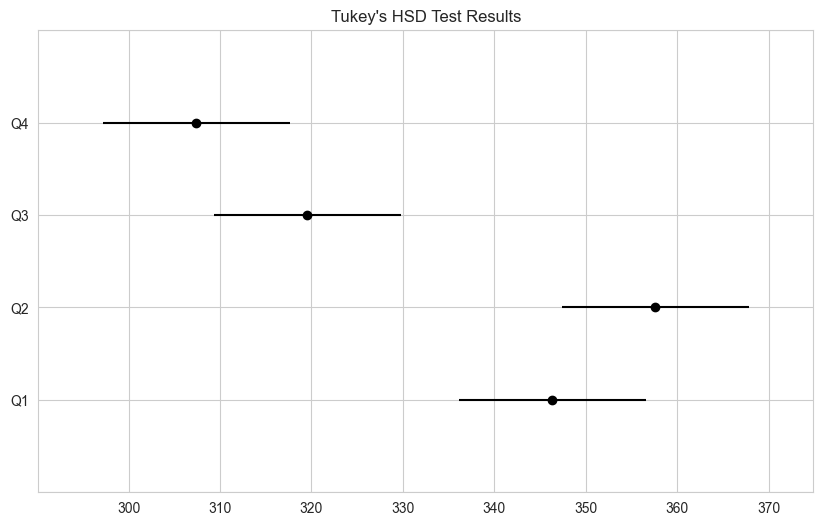

In [172]:
model = ols('Revenue ~ (Quarter)', data=result_1).fit()
anova_table = sm.stats.anova_lm(model)

print("\nANOVA Table:")
print(anova_table)


tukey_results = pairwise_tukeyhsd(result_1['Revenue'], result_1['Quarter'], alpha=0.05)

print("\nTukey's Test Results:")
print(tukey_results)

tukey_results.plot_simultaneous()
plt.title("Tukey's HSD Test Results")
plt.show()


# Conclusion

1. One-sample t-test
We can use a one-sample t-test to test whether a sample mean differs from a known or hypothesized value. For instance, we can search for historical or expected mean values for a specific column and use that value to verify whether our assumption is correct. Sometimes, the sample mean we calculate may appear to be far from the target value; however, by conducting a one-sample t-test, we can determine if the observed difference is statistically significant or if it's within an acceptable range, indicating that the difference may not be meaningful. In my case, we can see that μ is not statistically significantly different from the target mean of $117.

2. 2-sample t-test
2-sample t-test usually uses to test difference between two groups. I used it to test if the difference between the first and second halves of the year, and the result shows an extremely small p-value. Thus we rejected H0 and concluded that there's significant difference between the first and second halves of the year.

3. ANOVA
We used ANOVA to test the significance among different groups. I divided the data into four categories, with Jan, Feb, Mar as Q1; Apr, May, Jun as Q2...etc, to have a finer grouping for the ANOVA test. The result shows that the p-value is quite small thus we rejected H0 which implies that we're having statistically significant difference among group. After conducting Tukey's test, we confirmed that the most significant differences are observed between Q1 and Q3, Q1 and Q4, and Q2 and Q4. These comparisons suggest that spending decreases in the later quarters of the year, particularly in Q3 and Q4.